In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
##1.讀入 MNSIT 數據

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
len(y_train)

60000

In [8]:
len(y_test)

10000

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
n=1111
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
y_train[n]

5

這是 Sandal


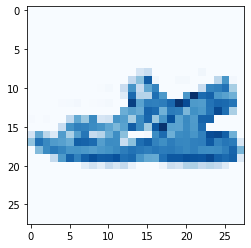

In [12]:
n = 1111
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Blues');

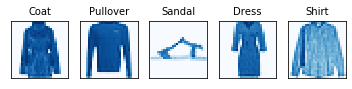

In [13]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Blues')

In [14]:
# 觀察資料幾筆

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_test.shape

(10000, 28, 28)

In [17]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 151,
        154, 164, 149, 183, 190,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  37,  96, 224, 214,
        197, 122, 120, 209, 212, 154,  81,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  45, 192, 212, 173, 170, 178,
        198,  64, 124, 222, 125, 147, 190, 181,  88,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,  35, 193, 176, 147, 178, 139, 144,
        170, 187, 209, 132, 137, 134, 137, 153, 171, 124,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 154, 202, 156, 161, 175, 137, 142,
        142, 168, 134, 142, 151, 144, 161, 147, 141, 168,  35,   0,   3,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 178, 229, 127, 168, 159, 137, 144,
        156, 156, 119, 158, 156, 127, 142, 146, 141, 183,  79,   0,   0,
          0,   0],
       [  

In [18]:
#像素的最大值
np.max(x_train[n])

255

In [19]:
print(set(y_train))#有幾類

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [20]:
#處理資料

In [21]:
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [24]:
y_train[5211]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [25]:
#建立神經網絡

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [36]:
##修改了神經層數、個數及lr
model = Sequential()
model.add(Dense(300, input_dim=784, activation='relu'))
model.add(Dense(211, activation='relu'))
model.add(Dense(112, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mse', optimizer=SGD(lr=0.002), metrics=['accuracy'])

In [37]:
#觀看結構
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_9 (Dense)              (None, 211)               63511     
_________________________________________________________________
dense_10 (Dense)             (None, 112)               23744     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1130      
Total params: 323,885
Trainable params: 323,885
Non-trainable params: 0
_________________________________________________________________


In [39]:
#訓練
model.fit(x_train, y_train, batch_size=100, epochs=100)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0889 - accuracy: 0.2098
Epoch 2/100
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0883 - accuracy: 0.2462
Epoch 3/100
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0876 - accuracy: 0.2677
Epoch 4/100
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0870 - accuracy: 0.2828
Epoch 5/100
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0863 - accuracy: 0.2943
Epoch 6/100
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0856 - accuracy: 0.3051
Epoch 7/100
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0848 - accuracy: 0.3158
Epoch 8/100
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0840 - accuracy: 0.3271
Epoch 9/100
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0832 - accuracy: 0.3406
Epoch

In [40]:
#正確率有點低，繼續訓練
model.fit(x_train, y_train, batch_size=100, epochs=50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0340 - accuracy: 0.7884
Epoch 2/50
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0338 - accuracy: 0.7897
Epoch 3/50
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0337 - accuracy: 0.7903
Epoch 4/50
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0335 - accuracy: 0.7915
Epoch 5/50
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0334 - accuracy: 0.7926s - loss: 0.033
Epoch 6/50
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0332 - accuracy: 0.7931
Epoch 7/50
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0331 - accuracy: 0.7944
Epoch 8/50
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0329 - accuracy: 0.7952
Epoch 9/50
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0328 - accuracy: 0.7958

In [41]:
#測試結果
result = model.predict_classes(x_test)

神經網路預測是: Dress


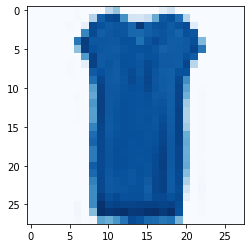

In [42]:
n = 9211
print('神經網路預測是:', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Blues')